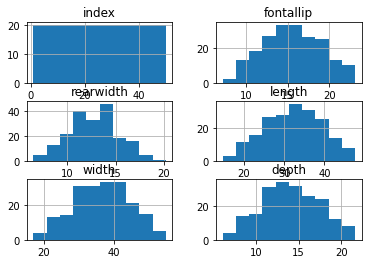

In [15]:
import pandas as pd
url='crabs.csv'
data=pd.read_csv(url)
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [16]:
correlation=data.corr()
print(correlation)

              index  fontallip  rearwidth    length     width     depth
index      1.000000   0.862876   0.840040  0.911436  0.928248  0.864459
fontallip  0.862876   1.000000   0.906988  0.978842  0.964956  0.987627
rearwidth  0.840040   0.906988   1.000000  0.892743  0.900402  0.889205
length     0.911436   0.978842   0.892743  1.000000  0.995023  0.983204
width      0.928248   0.964956   0.900402  0.995023  1.000000  0.967812
depth      0.864459   0.987627   0.889205  0.983204  0.967812  1.000000


<Axes: >

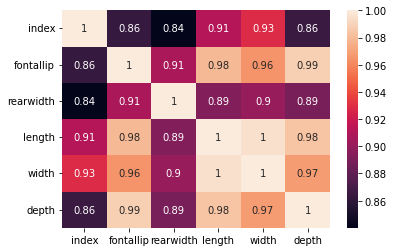

In [17]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='index', ylabel='width'>

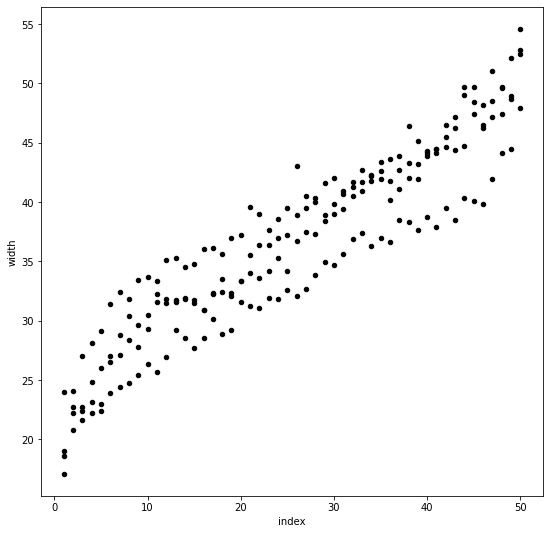

In [18]:
data.plot(kind='scatter',x='index',y='width',figsize=(9,9),color='black')

In [19]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['index']),y=data['width'])
print(model.intercept_)
print(model.coef_)
model.score(X=pd.DataFrame(data['index']),y=data['width'])

23.53479591836735
[0.50508643]


0.8616444887014116

In [20]:
model=linear_model.LinearRegression()

model.fit(X=pd.DataFrame([data['index'],data['index']**2,data['index']**3,data['index']**4,data['index']**5]).T,y=data['width'])
print('Intercept of model:',model.intercept_)
print('Coefient of model:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=pd.DataFrame([data['index'],data['index']**2,data['index']**3,data['index']**4,data['index']**5]).T,y=data['width']))

Intercept of model: 17.313491350524814
Coefient of model: [ 2.61936127e+00 -2.14393745e-01  9.56961454e-03 -1.96184937e-04
  1.49996064e-06]
Độ chính xác của mô hình: 0.8796181472579151


In [21]:
model=linear_model.LinearRegression()

model.fit(X=pd.DataFrame([data['index'],data['index']**2,data['index']**3,data['index']**4,data['index']**5,data['index']**6,data['index']**7,data['index']**8,data['index']**9,data['index']**10]).T,y=data['width'])
print('Intercept of model:',model.intercept_)
print('Coefient of model:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=pd.DataFrame([data['index'],data['index']**2,data['index']**3,data['index']**4,data['index']**5,data['index']**6,data['index']**7,data['index']**8,data['index']**9,data['index']**10]).T,y=data['width']))

Intercept of model: 21.617807961244722
Coefient of model: [ 3.75556498e-03  2.29988197e-02  6.71943187e-02 -1.34089528e-02
  1.14157445e-03 -5.33119433e-05  1.46759271e-06 -2.37731543e-08
  2.09734380e-10 -7.77416326e-13]
Độ chính xác của mô hình: 0.8786446254296371


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


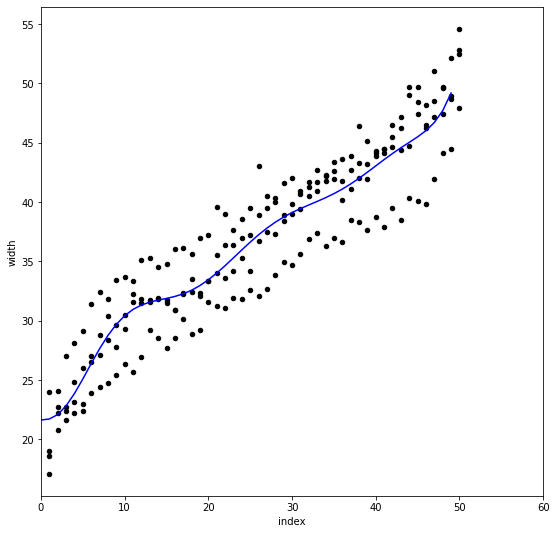

In [23]:
import numpy as np
range=np.arange(0,50,1)

predictor = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred = model.predict(X=predictor)
data.plot(kind='scatter',x='index',y='width',figsize=(9,9),color='black',xlim=(0,60))
plt.plot(range,y_pred,color='blue')